<a href="https://colab.research.google.com/github/MargaritaKotova/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence-course/blob/master/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install "tensorflow>=2.0.0"
 import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 3.9MB 33.2MB/s 
     |████████████████████████████████| 450kB 54.2MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
2.1.0


In [0]:
from sklearn.datasets import load_breast_cancer 

In [2]:
data = load_breast_cancer()

NameError: ignored

In [0]:
type(data)

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
data.data.shape

(569, 30)

In [0]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
data.target.shape

(569,)

In [0]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
N

381

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1,activation='sigmoid')])

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100)


print("Train score:", model.evaluate(X_train, y_train))
print("Test score", model.evaluate(X_test, y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.8827 - accuracy: 0.4541 - val_loss: 0.7794 - val_accuracy: 0.4947
Epoch 2/100
381/381 [==============================] - 0s 94us/sample - loss: 0.7982 - accuracy: 0.5013 - val_loss: 0.7134 - val_accuracy: 0.5532
Epoch 3/100
381/381 [==============================] - 0s 92us/sample - loss: 0.7227 - accuracy: 0.5433 - val_loss: 0.6564 - val_accuracy: 0.5904
Epoch 4/100
381/381 [==============================] - 0s 109us/sample - loss: 0.6609 - accuracy: 0.5984 - val_loss: 0.6068 - val_accuracy: 0.6436
Epoch 5/100
381/381 [==============================] - 0s 115us/sample - loss: 0.6055 - accuracy: 0.6640 - val_loss: 0.5643 - val_accuracy: 0.6755
Epoch 6/100
381/381 [==============================] - 0s 100us/sample - loss: 0.5597 - accuracy: 0.7008 - val_loss: 0.5279 - val_accuracy: 0.7287
Epoch 7/100
381/381 [==============================] - 0s 97us/sample - loss

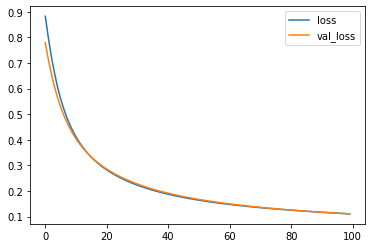

In [0]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

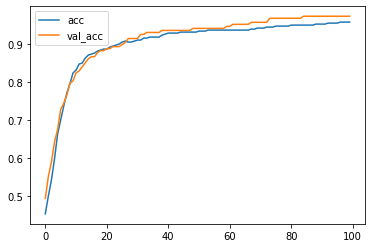

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()